# Definition
<br/>

An **articulation point** (also known as a **cut vertex**) in a graph is a vertex whose removal (along with all edges incident to it) increases the number of connected components of the graph. In other words, it is a node that, if removed, will disconnect the graph or make it less connected by splitting it into two or more separate sub-graphs.

**Key points:**
- Removing an articulation point increases the number of connected components in the graph.
- Articulation points represent critical nodes whose failure would disrupt connectivity in networks.
- If a graph has no articulation points, it is called *biconnected*.
***

In [2]:
edges = [
    (0, 1),
    (0, 2),
    (0, 3),
    (2, 3),
    (2, 4),
    (2, 5),
    (4, 6),
    (5, 6),
]

incidence_matrix = [[0 for i in range(7)] for j in range(7)]

for u, v in edges:
    incidence_matrix[u][v] = 1
    incidence_matrix[v][u] = 1

incidence_matrix

[[0, 1, 1, 1, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 1, 1, 1, 0],
 [1, 0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 1],
 [0, 0, 1, 0, 0, 0, 1],
 [0, 0, 0, 0, 1, 1, 0]]

## Visualizing the graph

In [3]:
import networkx as nx 
import matplotlib.pyplot as plt 

# Defining a Class 
class GraphVisualization: 

    def __init__(self, weighted, edge_list = [], adjancency_matrix = [], isDirected = False): 
        self.weighted = weighted
        self.G = (nx.DiGraph() if isDirected else nx.Graph())
        
        if len(edge_list) > 0:
            for i in edge_list:
                self.G.add_edge(i[0], i[1], weight = i[2])
        
        elif len(adjancency_matrix) > 0:
            for i in range(len(adjancency_matrix)):
                for j in range(len(adjancency_matrix[i])):
                    if adjancency_matrix[i][j] <= 0: continue
                    self.G.add_edge(i, j, weight = adjancency_matrix[i][j])
        
        elif len(edge_list) == 0 and len(adjancency_matrix) == 0:
            raise Exception("I expect atleast an edge-list or an adjancency matrix")
    
    # In visualize function G is an object of 
    # class Graph given by networkx G.add_edges_from(visual) 
    # creates a graph with a given list 
    # nx.draw_networkx(G) - plots the graph 
    # plt.show() - displays the graph 
    def visualize(self):
        pos = nx.spring_layout(self.G, scale = 5000)

        # Manually scale up the positions for more spacing
        for key in pos:
            pos[key] *= 10000
        nx.draw_networkx(self.G, pos, node_size=700, node_color='#00ccff', font_size=10)

        if self.weighted:
            # Draw edge labels for weights
            labels = nx.get_edge_attributes(self.G, 'weight')
            nx.draw_networkx_edge_labels(self.G, pos, edge_labels=labels)
        plt.show()

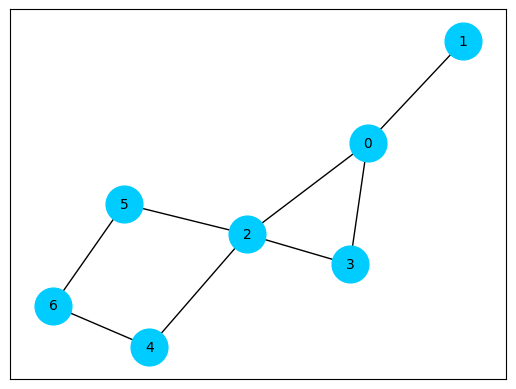

In [4]:
G1 = GraphVisualization(weighted = False, adjancency_matrix = incidence_matrix, isDirected = False)
G1.visualize()

## Algorithm
- First, we need to create the adjacency list for the given graph from the edge information(If not already given). And we will declare a variable timer(either globally or we can carry it while calling DFS), that will keep track of the time of insertion for each node. The timer may be initialized to 0 or 1 accordingly.
- Then we shall perform DFS for each component. For each component, the starting node will carry -1 as its parent.
    - Inside DFS, we will first mark the node visited and then store the time of insertion and the lowest time of insertion properly. We will declare a child variable to implement the logic for starting node.
    - Now, it’s time to visit the adjacent nodes. 
        - If the adjacent node is the parent itself, we will just continue to the next node.
        - If the adjacent node is not visited, we will call DFS for the adjacent node with the current node as the parent.
        - After the DFS gets completed, we will compare the lowest time of insertion of the current node and the adjacent node and take the minimum.<br/>Now, we will check if the lowest time of insertion of the adjacent node is greater or equal to the time of insertion of the current node and also ensure that the current node is not the starting node(checking parent not equal -1).<br/>If the condition matches, then we will mark the current node in our hash array as one of our answers as it is one of the articulation points of the graph.<br/>Then we will increment the child variable by 1.
        - If the adjacent node is visited, we will just compare the lowest time of insertion of the current node and the time of insertion of the adjacent node and take the minimum.
    - Finally, we shall check if the number of child nodes is greater than 1 and if the current node is the starting node. If it is then we will keep the starting node marked in our hash array as the starting node is also an articulation point in this case.
- Finally, our answer array will store all the articulation points.
***
**Note:** Lowest time of insertion is also called low-link value.

In [5]:
from typing import List

class graphTraversal:
    def __init__(self, graph_: List[List[int]]):
        self.searchTime = 0
        self.articulationPoints = []
        self.graph = graph_[:]
        self.numVertices = len(self.graph)
        self.lowLinkValues = [0 for i in range(self.numVertices)]
        self.searchTimes = [0 for i in range(self.numVertices)]
        self.visitedVertices = [False for i in range(self.numVertices)]

    def reset(self):
        self.numVertices = len(self.unvisitedVertices)
        self.lowLinkValues = [0 for i in range(self.numVertices)]
        self.searchTimes = [0 for i in range(self.numVertices)]

    def dfs(self, vertex = 0, parent = 0, isRoot = False):
        # if vertex already visited, return it's search-time
        if self.visitedVertices[vertex]:
            return self.searchTimes[vertex]

        self.searchTime += 1

        # if low link value of vertex is not set
        self.searchTimes[vertex] = self.searchTime
        self.lowLinkValues[vertex] = self.searchTime
        
        # add vertex to list of visited vertex
        self.visitedVertices[vertex] = True

        # checking if root of the graph is a articulation point
        # if and only if it has more than 1 child node
        if isRoot and self.graph[vertex].count(1) > 1:
            self.articulationPoints.append(vertex)
        
        # traverse all edges
        for edge in range(self.numVertices):
            if self.graph[vertex][edge] == 1 and not edge == parent:
                result = self.dfs(edge, vertex, False)
                if result < self.lowLinkValues[vertex]:
                    self.lowLinkValues[vertex] = result
                elif result >= self.searchTimes[vertex] and not isRoot:
                    if vertex not in self.articulationPoints:
                        self.articulationPoints.append(vertex)
        
        # remove the current vertex from the visited array
        self.visitedVertices[vertex] = False
        return self.lowLinkValues[vertex]

In [6]:
graph = graphTraversal(incidence_matrix)
graph.dfs(isRoot = True)
graph.articulationPoints

[0, 2]

***